## 4.5 Homework: 

### 4.5.1 Mandelbrot set

The Mandelbrot set, named after its discoverer, the French mathematician Mandelbrot, 
is a fractal, an infinitely ramified mathematical object that contains structure 
within structure within structure, as deep as we care to look.

The definition of the Mandelbrot set is in terms of complex numbers as follows.
Consider the equation

$$z' = z^2 + c$$

where $z$ is a complex number and $c$ is a complex constant. For any given value of
$c$ this equation turns an input number z into an output number $z'$. 

The definition of the Mandelbrot set involves the repeated iteration of this equation: 
we take an initial starting value of $z$ and feed it into the equation to get a new value $z'$. 

Then we take that value and feed it in again to get another value, and so forth. 


The Mandelbrot set is the set of points in the complex plane that satisfies the following definition:

_For a given complex value of c, start with z = 0 and iterate repeatedly. If the
magnitude |z| of the resulting value is ever greater than 2, then the point in the
complex plane at position c is not in the Mandelbrot set, otherwise it is in the set._

In order to use this definition one would, in principle, have to iterate infinitely many
times to prove that a point is in the Mandelbrot set, since a point is in the set only if
the iteration never passes |z| = 2 ever. In practice, however, one usually just performs
some large number of iterations, say 100, and if |z| hasn’t exceeded 2 by that point then
we call that good enough.

#### Task

Write a program to make an image of the Mandelbrot set by performing the iteration
for all values of $c = x + iy$ on an $N \times N$ grid spanning the region where −2 ≤ x ≤ 2
and −2 ≤ y ≤ 2. Make a density plot in which grid points inside the Mandelbrot set
are colored black and those outside are colored white. 

Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a
small value (perhaps $N$ = 100) —so that your program runs quickly while you are
testing it. Once you are sure it is working correctly, increase the value of N to produce
a final high-quality image of the shape of the set.

- plotting x, y, c on a density graph
- $z' = z^2 + c$ tests c a certain # of times (iterations [N]) to see if |z|<2. if |z|<2 at all iterations, then c is part of set. if |z|>2 at any iteration, then that value of c (and thus x & y) is not part of the set. z changes for all these iterations but c stays the same
- c comes from $c = x+iy$ => in python would be typed as c = x+y*1.0j
- −2 ≤ x ≤ 2 and −2 ≤ y ≤ 2
- start with $N = 100$ for a $100 x 100$ graph

(below is my effort)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

N = 100
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
z = 0

#array to store values of z (represents the height of density graph)
z_arr = np.empty([N, N], float)

#fill z_arr with solutions
for x_val in range(len(x)):
    for y_val in range(len(y)):
        #z = 0
        c = x[x_val] + y[y_val]*1.0j
        #inset = True
        for z_val in range(N):  #iterating to test
            z1 = z**2 + c
            #print('values= ', z_val, z, c)
            if abs(z) < 2:
                z_arr[x_val,y_val] = z_val
                z = z1
                #inset = False

print(z_arr)

#create graph
plt.imshow(z_arr,origin='lower',extent=[-2, 2, -2, 2],cmap="hot")
plt.title('Mandelbrot set')
plt.gray
plt.show

[[0.00000000e+000 8.31394425e-312 0.00000000e+000 ... 0.00000000e+000
  1.48539705e-313 3.60739284e-313]
 [8.29700354e-312 8.31392747e-312 8.29700354e-312 ... 3.45845952e-323
  8.31407487e-312 5.07405418e-321]
 [8.31407487e-312 4.44659081e-323 0.00000000e+000 ... 0.00000000e+000
  6.91691904e-323 8.31407487e-312]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


<function matplotlib.pyplot.show(close=None, block=None)>

In [22]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, *, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or :rc:`image.interpolation`.

(below is copied from the wiki for comparison)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


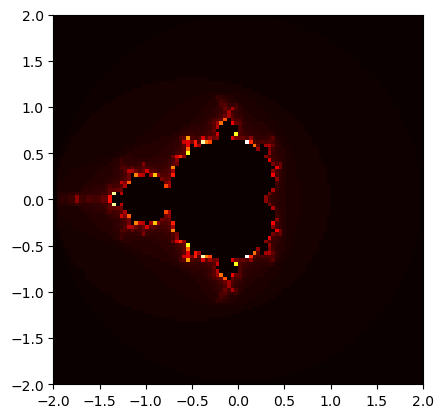

In [1]:
from numpy import linspace, zeros, absolute
from matplotlib import pyplot as plt


a1,b1,points1 = -2,2,100  # Side of x
a2,b2,points2 = -2,2,100    # Side of y
N_iter = 100                 # the maximum number of iterations

x_set = linspace(a1,b1,points1)
y_set = linspace(a2,b2,points2)

# Make an array to store the grids
mandset = zeros([points1,points2],float)

# Calculate the values in the array
for i in range(len(y_set)): 
    for j in range(len(x_set)):
        
        #initial conditions
        z = 0        
        c = x_set[j] + y_set[i]*1j       
        inset = True

        #we need to iterate it to see if the point satisfies the condition
        for k in range(N_iter):
            z = z**2+c
            #print('values:  ', k,z,c)
            if absolute(z)>2:
                mandset[i,j]=k
                inset = False
                break

print(mandset)
# Make the plot
plt.imshow(mandset,origin="lower",extent=[a1,b1,a2,b2],cmap="hot")
#plt.gray()
plt.show()